In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(r"/content/drive/MyDrive/3_total_with_clusters.csv")
df = df.drop('Unnamed: 0', axis=1)
df_groups = df.groupby('house_cluster')

Cluster 0

In [7]:
cluster0 = df_groups.get_group(0)
energy0 = cluster0.drop('house_cluster', axis=1)

In [8]:
housecount0 = cluster0.groupby('day')[['LCLid']].nunique()
# housecount0.get_group('2012-11-07')
housecount0.head()

,LCLid
day,
2012-04-04,1
2012-04-05,2
2012-04-06,2
2012-04-07,2
2012-04-08,2


<Axes: xlabel='day'>

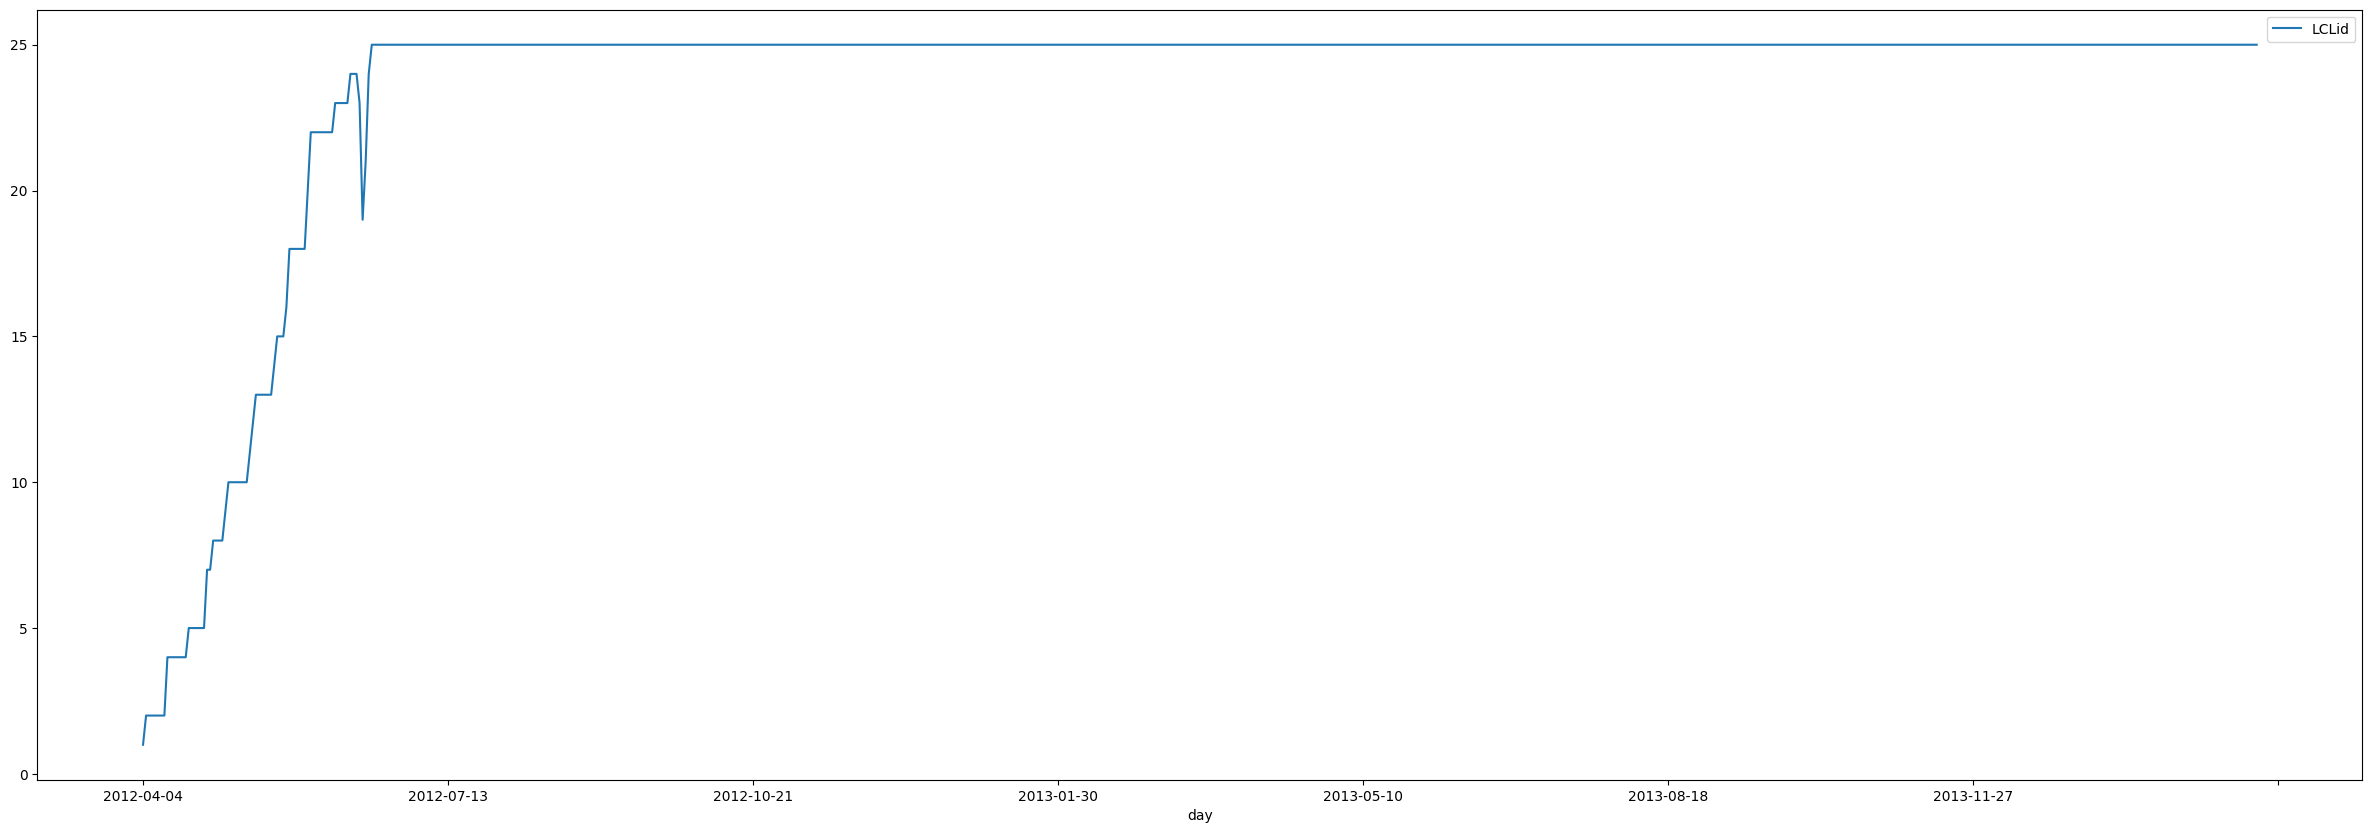

In [9]:
housecount0.plot(figsize=(30,10))

In [10]:
# [['LCLid', 'energy_sum', 'temperatureMax', 'windSpeed', 'humidity', 'holiday_ind']]
energy0 = cluster0.groupby('day')[['energy_sum', 'temperatureMax', 'windSpeed', 'humidity', 'holiday_ind']].sum()
energy0 = energy0.merge(housecount0, on=['day'])
energy0 = energy0.reset_index()
energy0.count()

day               694
energy_sum        694
temperatureMax    694
windSpeed         694
humidity          694
holiday_ind       694
LCLid             694
dtype: int64

In [11]:
energy0['day'] = pd.to_datetime(energy0['day'],format='%Y-%m-%d').dt.date

In [12]:
energy0['avg_energy'] =  energy0['energy_sum']/energy0['LCLid']
print("Starting Point of Data at Day Level",min(energy0['day']))
print("Ending Point of Data at Day Level",max(energy0['day']))

Starting Point of Data at Day Level 2012-04-04
Ending Point of Data at Day Level 2014-02-28


In [13]:
energy0

,day,energy_sum,temperatureMax,windSpeed,humidity,holiday_ind,LCLid,avg_energy
0,2012-04-04,5.067,8.92,4.60,0.76,0.0,1,5.06700
1,2012-04-05,9.985,24.56,4.96,1.30,0.0,2,4.99250
2,2012-04-06,10.952,20.96,4.18,1.50,0.0,2,5.47600
3,2012-04-07,12.227,26.16,5.70,1.62,2.0,2,6.11350
4,2012-04-08,11.725,21.62,11.80,1.78,2.0,2,5.86250
...,...,...,...,...,...,...,...,...
689,2014-02-24,162.012,355.75,125.50,18.50,0.0,25,6.48048
690,2014-02-25,154.737,285.75,142.25,19.50,0.0,25,6.18948
691,2014-02-26,158.273,282.25,95.50,18.25,0.0,25,6.33092
692,2014-02-27,158.042,257.75,103.50,18.50,0.0,25,6.32168


In [14]:
energy0.describe()

,energy_sum,temperatureMax,windSpeed,humidity,holiday_ind,LCLid,avg_energy
count,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000
mean,146.802513,341.284870,85.369020,18.465231,6.714697,23.670029,6.177635
std,39.443505,170.874485,44.224028,4.312336,11.024799,4.554534,1.073248
min,2.676000,-1.500000,2.360000,0.760000,0.000000,1.000000,0.107040
25%,130.964750,221.085000,54.062500,17.182500,0.000000,25.000000,5.366890
50%,147.566500,326.250000,83.375000,19.500000,0.000000,25.000000,5.984860
75%,172.113750,467.312500,110.500000,21.250000,24.750000,25.000000,6.915038
max,367.276000,810.000000,249.000000,33.000000,50.000000,25.000000,14.691040


In [15]:
# Weather clusters
from sklearn.preprocessing import MinMaxScaler

scaler0 = MinMaxScaler()
weather_scaled0 = scaler0.fit_transform(energy0[['temperatureMax','humidity','windSpeed']])

In [16]:
weather_scaled0

array([[0.01284042, 0.        , 0.00908206],
       [0.03211337, 0.01674938, 0.01054168],
       [0.02767714, 0.02295285, 0.00737918],
       ...,
       [0.34966112, 0.5424938 , 0.37763542],
       [0.31947012, 0.55024814, 0.41007136],
       [0.22828096, 0.64330025, 0.21748297]])

[KMeans(n_clusters=1, n_init='auto'), KMeans(n_clusters=2, n_init='auto'), KMeans(n_clusters=3, n_init='auto'), KMeans(n_clusters=4, n_init='auto'), KMeans(n_clusters=5, n_init='auto'), KMeans(n_clusters=6, n_init='auto'), KMeans(n_clusters=7, n_init='auto'), KMeans(n_init='auto'), KMeans(n_clusters=9, n_init='auto'), KMeans(n_clusters=10, n_init='auto'), KMeans(n_clusters=11, n_init='auto'), KMeans(n_clusters=12, n_init='auto'), KMeans(n_clusters=13, n_init='auto'), KMeans(n_clusters=14, n_init='auto'), KMeans(n_clusters=15, n_init='auto'), KMeans(n_clusters=16, n_init='auto'), KMeans(n_clusters=17, n_init='auto'), KMeans(n_clusters=18, n_init='auto'), KMeans(n_clusters=19, n_init='auto')]
[-65.4051918697775, -43.47407674299018, -30.434154372877064, -21.353125150091707, -18.585174368785914, -15.077984403236428, -14.038837216474711, -12.5743154590735, -11.489550379013998, -10.413585393547848, -9.848556744457069, -9.173895396038414, -8.94717642100366, -8.10419868211992, -7.6287906933536

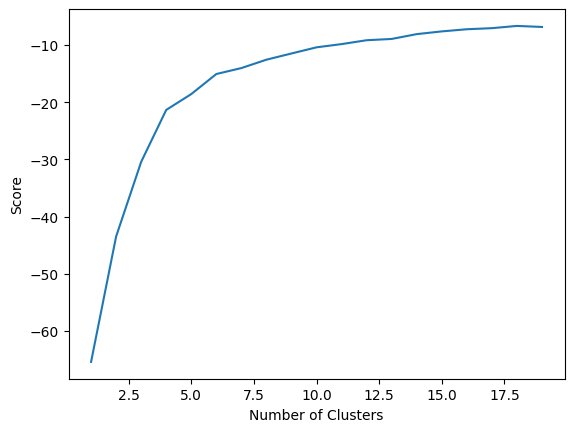

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


Nc0 = range(1,20)
kmeans0 = [KMeans(n_clusters=i, n_init='auto') for i in Nc0]
print(kmeans0)

score0 = [kmeans0[i].fit(weather_scaled0).score(weather_scaled0) for i in range(len(kmeans0))]
print(score0)

plt.plot(Nc0, score0)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

In [18]:
kmeans0 = KMeans(n_clusters=3, max_iter=600, algorithm='lloyd', n_init='auto')
kmeans0.fit(weather_scaled0)
energy0['weather_cluster'] = kmeans0.labels_
energy0.head()

,day,energy_sum,temperatureMax,windSpeed,humidity,holiday_ind,LCLid,avg_energy,weather_cluster
0,2012-04-04,5.067,8.92,4.60,0.76,0.0,1,5.0670,2
1,2012-04-05,9.985,24.56,4.96,1.30,0.0,2,4.9925,2
2,2012-04-06,10.952,20.96,4.18,1.50,0.0,2,5.4760,2
3,2012-04-07,12.227,26.16,5.70,1.62,2.0,2,6.1135,2
4,2012-04-08,11.725,21.62,11.80,1.78,2.0,2,5.8625,2


In [19]:
# Model

In [20]:
import numpy as np

np.random.seed(11)
dataframe = energy0.loc[:,'avg_energy']
dataset = dataframe.values
dataset = dataset.astype('float32')

In [21]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [22]:
reframed0 = series_to_supervised(dataset, 7,1)
reframed0.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,5.0670,4.9925,5.4760,6.1135,5.8625,9.8745,4.73600,4.68650
8,4.9925,5.4760,6.1135,5.8625,9.8745,4.7360,4.68650,5.54050
9,5.4760,6.1135,5.8625,9.8745,4.7360,4.6865,5.54050,7.79000
10,6.1135,5.8625,9.8745,4.7360,4.6865,5.5405,7.79000,6.78375
11,5.8625,9.8745,4.7360,4.6865,5.5405,7.7900,6.78375,6.68675


In [23]:
reframed0['weather_cluster'] = energy0['weather_cluster'].values[7:]
reframed0['holiday_ind']= energy0['holiday_ind'].values[7:]

In [24]:
reframed0 = reframed0.reindex(['weather_cluster', 'holiday_ind','var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)','var1(t-2)', 'var1(t-1)', 'var1(t)'], axis=1)
reframed0 = reframed0.values

In [25]:
n = int(0.2*(len(energy0)))
n

138

In [26]:
# Normalisation
scaler0 = MinMaxScaler(feature_range=(0, 1))
reframed0 = scaler0.fit_transform(reframed0)

In [27]:
train0 = reframed0[:(len(reframed0)-n), :]
test0 = reframed0[(len(reframed0)-n):len(reframed0), :]

In [28]:
train_X0, train_y0 = train0[:, :-1], train0[:, -1]
test_X0, test_y0 = test0[:, :-1], test0[:, -1]

In [29]:
train_X0 = train_X0.reshape((train_X0.shape[0], 1, train_X0.shape[1]))
test_X0 = test_X0.reshape((test_X0.shape[0], 1, test_X0.shape[1]))
print(train_X0.shape, train_y0.shape, test_X0.shape, test_y0.shape)

(549, 1, 9) (549,) (138, 1, 9) (138,)


In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.regularizers import L2

In [31]:
# # design network
# model = Sequential()
# model.add(LSTM(50, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
# model.add(LSTM(50, return_sequences=True))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer='rmsprop')

# # fit network
# history = model.fit(train_X0, train_y0, epochs=50, batch_size=72, verbose=2, shuffle=False, validation_data=(test_X0, test_y0))

# # plot history
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()


In [32]:
# # design network
# model = Sequential()
# model.add(LSTM(50, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(50, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu', kernel_regularizer=L2(0.01)))
# model.add(Dense(1))
# model.compile(loss='mse', optimizer='adam')

# # fit network
# history = model.fit(train_X0, train_y0, epochs=100, batch_size=32, verbose=2, shuffle=False, validation_data=(test_X0, test_y0))

# # plot history
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()

Epoch 1/100
18/18 - 4s - loss: 0.1223 - val_loss: 0.1160 - 4s/epoch - 233ms/step
Epoch 2/100
18/18 - 0s - loss: 0.0405 - val_loss: 0.0164 - 98ms/epoch - 5ms/step
Epoch 3/100
18/18 - 0s - loss: 0.0045 - val_loss: 0.0034 - 73ms/epoch - 4ms/step
Epoch 4/100
18/18 - 0s - loss: 0.0052 - val_loss: 0.0038 - 75ms/epoch - 4ms/step
Epoch 5/100
18/18 - 0s - loss: 0.0035 - val_loss: 0.0030 - 72ms/epoch - 4ms/step
Epoch 6/100
18/18 - 0s - loss: 0.0026 - val_loss: 0.0028 - 85ms/epoch - 5ms/step
Epoch 7/100
18/18 - 0s - loss: 0.0026 - val_loss: 0.0027 - 98ms/epoch - 5ms/step
Epoch 8/100
18/18 - 0s - loss: 0.0023 - val_loss: 0.0027 - 97ms/epoch - 5ms/step
Epoch 9/100
18/18 - 0s - loss: 0.0022 - val_loss: 0.0026 - 82ms/epoch - 5ms/step
Epoch 10/100
18/18 - 0s - loss: 0.0021 - val_loss: 0.0026 - 100ms/epoch - 6ms/step
Epoch 11/100
18/18 - 0s - loss: 0.0020 - val_loss: 0.0026 - 95ms/epoch - 5ms/step
Epoch 12/100
18/18 - 0s - loss: 0.0022 - val_loss: 0.0026 - 91ms/epoch - 5ms/step
Epoch 13/100
18/18 - 0s 

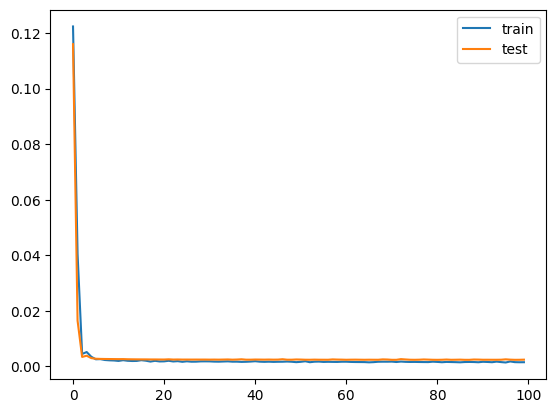

In [33]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X0, train_y0, epochs=100, batch_size=32, verbose=2, shuffle=False, validation_data=(test_X0, test_y0))

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

5/5 [==============================] - 1s 2ms/step
(138, 1) (138,)
(138,) (138,)
Test MAE: 0.029


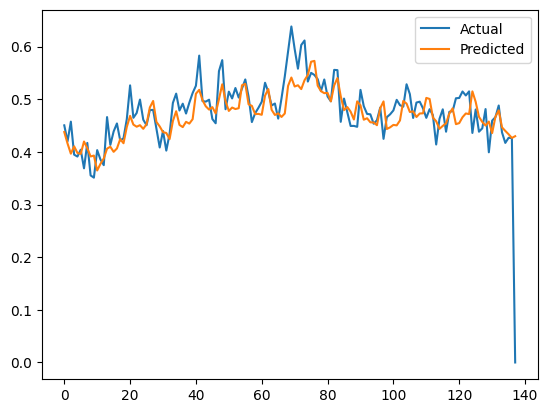

In [34]:
# make predictions on test data
from sklearn.metrics import mean_absolute_error


y_pred = model.predict(test_X0)
print(y_pred.shape, test_y0.shape)
y_pred = y_pred.reshape(-1)
test_y0 = test_y0.reshape(-1)
print(y_pred.shape, test_y0.shape)
# calculate MAE
mae = mean_absolute_error(test_y0, y_pred)
print('Test MAE: %.3f' % mae)

# plot actual vs predicted values
plt.plot(test_y0)
plt.plot(y_pred)
plt.legend(['Actual', 'Predicted'])
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error

# calculate MSE
mse = mean_squared_error(test_y0, y_pred)
print('Test MSE: %.3f' % mse)

rmse = np.sqrt(mse)
print('Test RMSE: %.3f' % rmse)

Test MSE: 0.002
Test RMSE: 0.049


In [36]:
from sklearn.metrics import r2_score
acc = r2_score(test_y0, y_pred)
print(acc)

0.42665387524827725


Cross Validation

In [37]:
df_temp0 = pd.DataFrame(reframed0, columns = ['weather_cluster', 'holiday_ind','var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)','var1(t-2)', 'var1(t-1)', 'var1(t)'])
df_temp0['date'] = energy0['day']
df_temp0 = df_temp0[['date', 'weather_cluster', 'holiday_ind','var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)','var1(t-2)', 'var1(t-1)', 'var1(t)']]
df_temp0

,date,weather_cluster,holiday_ind,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
0,2012-04-04,1.0,0.00,0.104647,0.097716,0.142698,0.202006,0.178655,0.551903,0.073853,0.314006
1,2012-04-05,1.0,0.00,0.097716,0.142698,0.202006,0.178655,0.551903,0.073853,0.069248,0.372563
2,2012-04-06,1.0,0.00,0.142698,0.202006,0.178655,0.551903,0.073853,0.069248,0.148698,0.526807
3,2012-04-07,1.0,0.08,0.202006,0.178655,0.551903,0.073853,0.069248,0.148698,0.357976,0.457811
4,2012-04-08,1.0,0.08,0.178655,0.551903,0.073853,0.069248,0.148698,0.357976,0.264362,0.451159
...,...,...,...,...,...,...,...,...,...,...,...
682,2014-02-17,0.0,0.00,0.237897,0.246597,0.296258,0.184868,0.266484,0.275467,0.305483,0.437016
683,2014-02-18,0.0,0.00,0.246597,0.296258,0.184868,0.266484,0.275467,0.305483,0.236148,0.417063
684,2014-02-19,0.0,0.00,0.296258,0.184868,0.266484,0.275467,0.305483,0.236148,0.209075,0.426761
685,2014-02-20,0.0,0.00,0.184868,0.266484,0.275467,0.305483,0.236148,0.209075,0.222234,0.426127


In [38]:
X = df_temp0.iloc[:,:-1]
y = df_temp0.iloc[:,-1]

In [39]:
from sklearn.model_selection import GroupKFold

# Assuming you have time series data X and target variable y, as well as a groups variable defining the groups
# For example, groups could be the year or month of each data point

# Define the number of folds and the groups for each data point
n_splits = 5
scores = []
groups = X['date']

# Define the grouped k-fold cross-validation object
group_kfold = GroupKFold(n_splits=n_splits)

In [40]:
X = X.drop(['date'], axis=1)
X

,weather_cluster,holiday_ind,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
0,1.0,0.00,0.104647,0.097716,0.142698,0.202006,0.178655,0.551903,0.073853
1,1.0,0.00,0.097716,0.142698,0.202006,0.178655,0.551903,0.073853,0.069248
2,1.0,0.00,0.142698,0.202006,0.178655,0.551903,0.073853,0.069248,0.148698
3,1.0,0.08,0.202006,0.178655,0.551903,0.073853,0.069248,0.148698,0.357976
4,1.0,0.08,0.178655,0.551903,0.073853,0.069248,0.148698,0.357976,0.264362
...,...,...,...,...,...,...,...,...,...
682,0.0,0.00,0.237897,0.246597,0.296258,0.184868,0.266484,0.275467,0.305483
683,0.0,0.00,0.246597,0.296258,0.184868,0.266484,0.275467,0.305483,0.236148
684,0.0,0.00,0.296258,0.184868,0.266484,0.275467,0.305483,0.236148,0.209075
685,0.0,0.00,0.184868,0.266484,0.275467,0.305483,0.236148,0.209075,0.222234


In [41]:
# Loop through each fold and split the data into training and testing sets
for train_index, test_index in group_kfold.split(X, y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Converting to nparray
    X_train = np.asarray(X_train).astype(np.float32)
    X_test = np.asarray(X_test).astype(np.float32)
    y_train = np.asarray(y_train).astype(np.float32)
    y_test = np.asarray(y_test).astype(np.float32)

    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    
    # Train and evaluate the model on the training and testing sets
    model.fit(X_train, y_train)
    score = model.evaluate(X_test, y_test)
    
    # Store the performance score for this fold
    scores.append(score)

# Compute the average performance score over all the folds
avg_score = sum(scores) / n_splits

5/5 [==============================] - 0s 4ms/step - loss: 0.0022


In [42]:
model.metrics_names

['loss']

In [43]:
scores

[0.0026301720645278692,
 0.0010159980738535523,
 0.0009275985648855567,
 0.0011136125540360808,
 0.002239488298073411]

In [44]:
avg_score

0.001585373911075294

In [45]:
# Interpretation:
# We took 'loss' as the evaluation metric while training our model, so this cross validation score basically means the how well the model is performing on data that it hasn't seen during training. 
# Here, the less validation score indicates better performance of the model. 
# Higher validation score would mean overfitting on the training data.

Grid Search

In [46]:
def create_model(units=50, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    return model

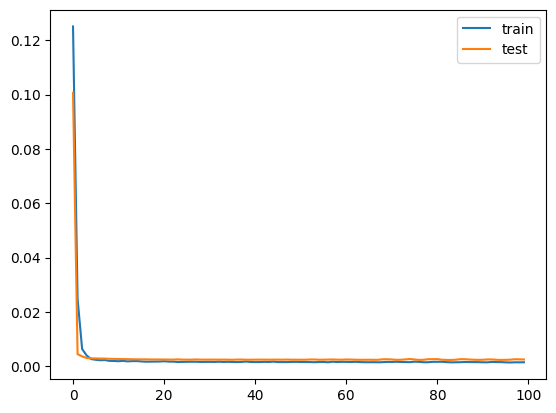

In [51]:
# MODEL update after Grid Search (units = 128,64 and verbose = 0)

# design network
model = Sequential()
model.add(LSTM(128, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X0, train_y0, epochs=100, batch_size=32, verbose=0, shuffle=False, validation_data=(test_X0, test_y0))

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

5/5 [==============================] - 1s 3ms/step
(138, 1) (138,)
(138,) (138,)
Test MAE: 0.031


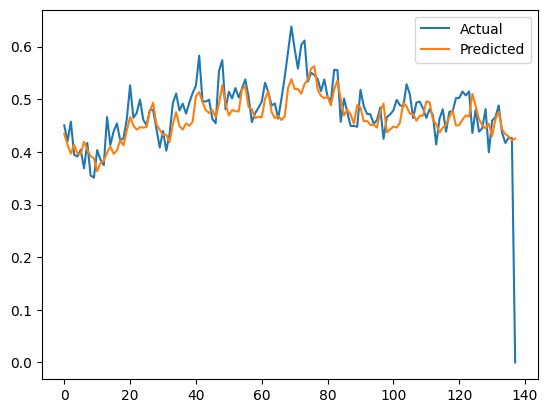

In [52]:
# make predictions on test data
from sklearn.metrics import mean_absolute_error


y_pred = model.predict(test_X0)
print(y_pred.shape, test_y0.shape)
y_pred = y_pred.reshape(-1)
test_y0 = test_y0.reshape(-1)
print(y_pred.shape, test_y0.shape)
# calculate MAE
mae = mean_absolute_error(test_y0, y_pred)
print('Test MAE: %.3f' % mae)

# plot actual vs predicted values
plt.plot(test_y0)
plt.plot(y_pred)
plt.legend(['Actual', 'Predicted'])
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error

# calculate MSE
mse = mean_squared_error(test_y0, y_pred)
print('Test MSE: %.3f' % mse)

rmse = np.sqrt(mse)
print('Test RMSE: %.3f' % rmse)

Test MSE: 0.003
Test RMSE: 0.050


In [54]:
from sklearn.metrics import r2_score
acc = r2_score(test_y0, y_pred)
print(acc)

0.40372186291439116
